<a href="https://colab.research.google.com/github/Samrrutha/Fake-news-detection-using-PCA-and-genetic-algorithm/blob/main/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA**

In [ ]:
import pandas as pd

# Load the CSVs properly
true_df = pd.read_csv("/content/True.csv", encoding='utf-8')
fake_df = pd.read_csv("/content/Fake.csv", encoding='utf-8')
# Keep only relevant columns if they exist
columns_to_keep = ['title', 'text', 'subject', 'date']
fake_df = fake_df[columns_to_keep]

# Check the first few rows again
print("True News Columns:", true_df.columns)
print(true_df.head())
print("Fake News Columns:", fake_df.columns)
print(fake_df.head())

True News Columns: Index(['title', 'text', 'subject', 'date'], dtype='object')
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   
Fake News Columns: 

<ipython-input-1-ba7957d95a32>:5: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  fake_df = pd.read_csv("/content/Fake.csv", encoding='utf-8')


In [ ]:
true_df['label'] = 1
fake_df['label'] = 0

In [ ]:
import pandas as pd

merged_df = pd.concat([true_df, fake_df], ignore_index=True)

In [ ]:
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44940 entries, 0 to 44939
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44919 non-null  object
 1   text     44919 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44940 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
merged_df['text_length'] = merged_df['text'].apply(lambda x: len(str(x)))
merged_df['title_length'] = merged_df['title'].apply(lambda x: len(str(x)))

**UNIVARIATE NON GRAPHICAL ANALYSIS**

In [ ]:
print("=== UNIVARIATE NON GRAPHICAL ANALYSIS ===\n")
print(merged_df[['text_length', 'title_length']].describe())

# Mode
print("\nMode of text length:", merged_df['text_length'].mode()[0])
print("Mode of title length:", merged_df['title_length'].mode()[0])

# Range
print("\nRange of text length:", merged_df['text_length'].max() - merged_df['text_length'].min())
print("Range of title length:", merged_df['title_length'].max() - merged_df['title_length'].min())


=== UNIVARIATE NON GRAPHICAL ANALYSIS ===

        text_length  title_length
count  44940.000000  44940.000000
mean    2470.773498     81.576791
std     2102.634180     27.296627
min        1.000000      3.000000
25%     1233.000000     63.000000
50%     2189.000000     74.000000
75%     3112.000000     93.000000
max    32759.000000    480.000000

Mode of text length: 1
Mode of title length: 64

Range of text length: 32758
Range of title length: 477


**UNIVARIATE GRAPHICAL ANALYSIS**

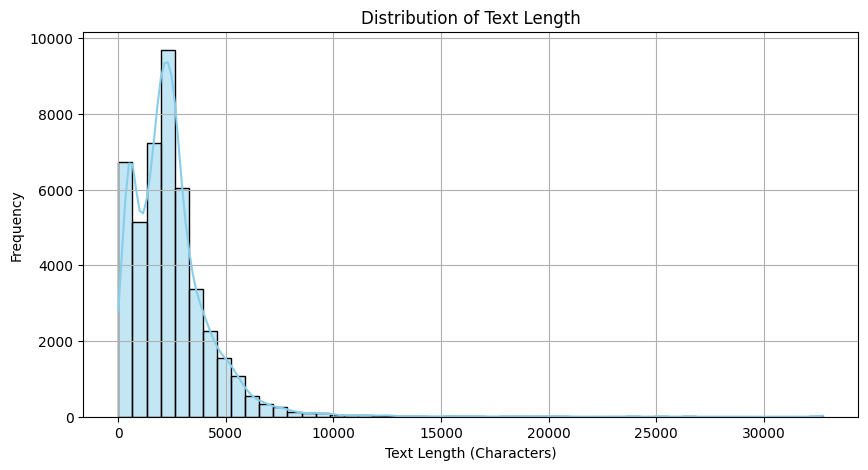

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(merged_df['text_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length (Characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<ipython-input-10-3758f6f47b93>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=merged_df, palette='Set2')


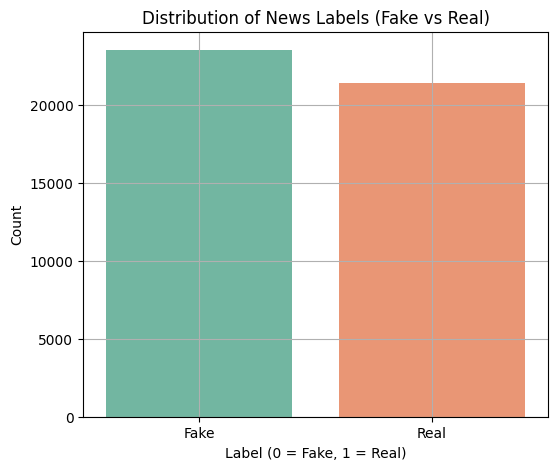

In [ ]:
plt.figure(figsize=(6, 5))
sns.countplot(x='label', data=merged_df, palette='Set2')
plt.title('Distribution of News Labels (Fake vs Real)')
plt.xlabel('Label (0 = Fake, 1 = Real)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.grid(True)
plt.show()

<ipython-input-11-74971f5e1b17>:8: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  fake_df = pd.read_csv("/content/Fake.csv")
<ipython-input-11-74971f5e1b17>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='word_

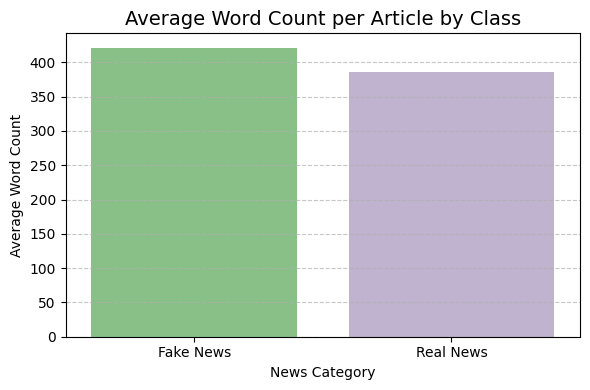

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load both datasets
true_df = pd.read_csv("/content/True.csv")
fake_df = pd.read_csv("/content/Fake.csv")

# Add labels: 1 for Real news, 0 for Fake news
true_df['label'] = 1
fake_df['label'] = 0

# Combine both datasets into one
df = pd.concat([true_df, fake_df], ignore_index=True)

# Create a new column for word count (using the 'text' column)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Calculate average word count for each class (0 = Fake, 1 = Real)
avg_word_count = df.groupby('label')['word_count'].mean().reset_index()

# Map labels to readable text
avg_word_count['label'] = avg_word_count['label'].map({0: 'Fake News', 1: 'Real News'})

# Plotting the bar plot
plt.figure(figsize=(6,4))
sns.barplot(x='label', y='word_count', data=avg_word_count, palette='Accent')

# Add title and labels
plt.title('Average Word Count per Article by Class', fontsize=14)
plt.xlabel('News Category')
plt.ylabel('Average Word Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-12-51f4054c8e6a>:8: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  fake_df = pd.read_csv("/content/Fake.csv")


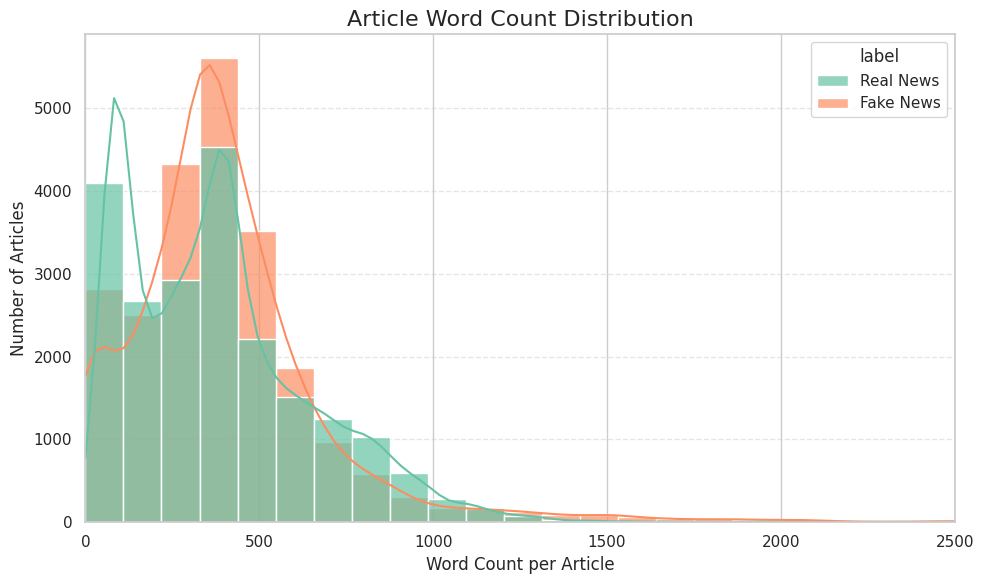

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
true_df = pd.read_csv("/content/True.csv")
fake_df = pd.read_csv("/content/Fake.csv")

# Add labels
true_df['label'] = 'Real News'
fake_df['label'] = 'Fake News'

# Combine the datasets
df = pd.concat([true_df, fake_df], ignore_index=True)

# Compute word count for each article
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Set plot style
sns.set(style="whitegrid")

# Plot histogram for word count distribution by class
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='word_count', hue='label', bins=50, kde=True, palette='Set2', alpha=0.7)

plt.xlim(0, 2500)
# Customize plot
plt.title('Article Word Count Distribution', fontsize=16)
plt.xlabel('Word Count per Article')
plt.ylabel('Number of Articles')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


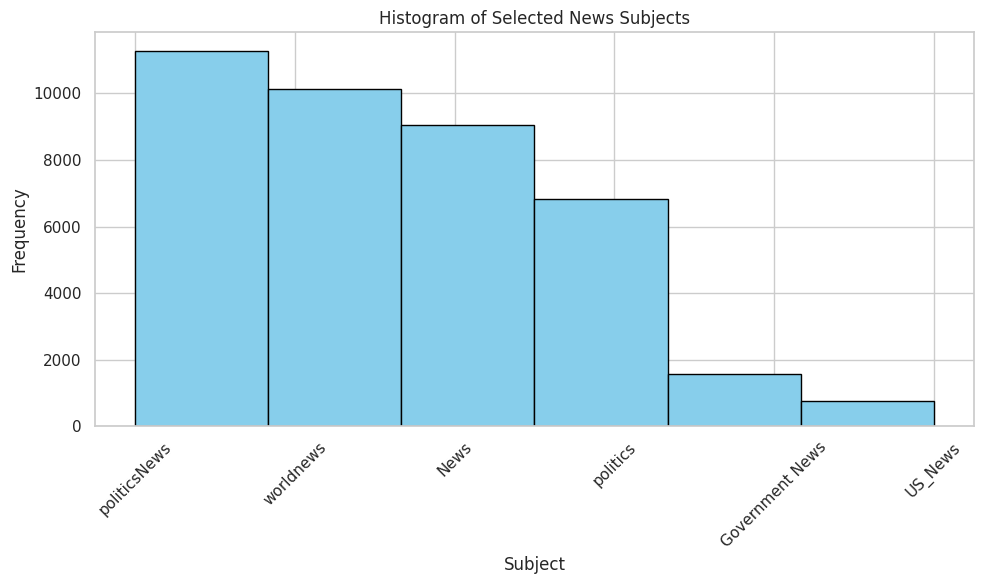

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Filter the selected subjects (already done previously)
valid_subjects = ['US_News', 'Government News', 'politicsNews', 'worldnews', 'News', 'politics']
filtered_df = merged_df[merged_df['subject'].isin(valid_subjects)]

# Step 2: Plot histogram (for categorical data)
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['subject'], bins=len(valid_subjects), color='skyblue', edgecolor='black')
plt.title('Histogram of Selected News Subjects')
plt.xlabel('Subject')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


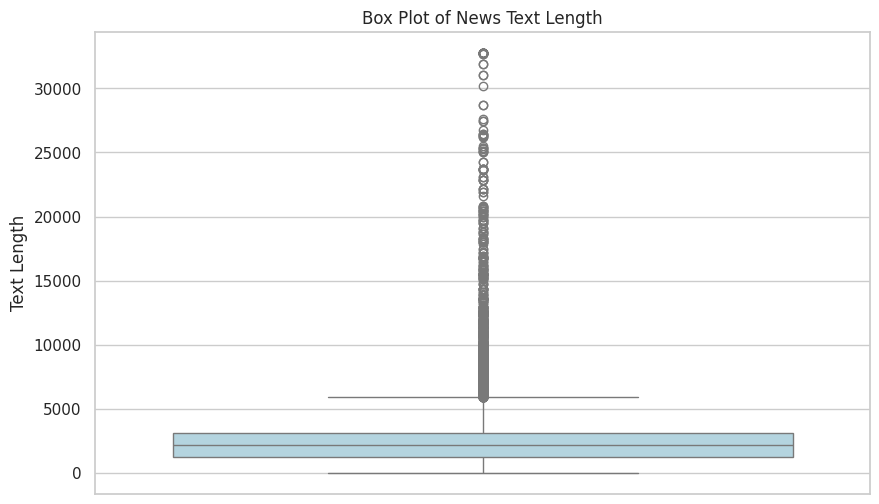

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot box plot for overall text_length distribution
plt.figure(figsize=(10, 6))
sns.boxplot(y=merged_df['text_length'], color='lightblue')
plt.title('Box Plot of News Text Length')
plt.ylabel('Text Length')
plt.show()


**MULTIVARIATE NON GRAPHICAL ANALYSIS**

In [ ]:
# Summary statistics (mean, std, min, max, etc.)
summary_stats = merged_df.describe()
print("Summary Statistics:\n")
print(summary_stats)

Summary Statistics:

              label   text_length  title_length
count  44940.000000  44940.000000  44940.000000
mean       0.476569   2470.773498     81.576791
std        0.499456   2102.634180     27.296627
min        0.000000      1.000000      3.000000
25%        0.000000   1233.000000     63.000000
50%        0.000000   2189.000000     74.000000
75%        1.000000   3112.000000     93.000000
max        1.000000  32759.000000    480.000000


In [ ]:
# Correlation matrix
correlation_table = merged_df.corr(numeric_only=True)
print("\nCorrelation Table:\n")
print(correlation_table)


Correlation Table:

                 label  text_length  title_length
label         1.000000    -0.031909     -0.590898
text_length  -0.031909     1.000000      0.029520
title_length -0.590898     0.029520      1.000000


**MULTIVARIATE GRAPHICAL ANALYSIS**

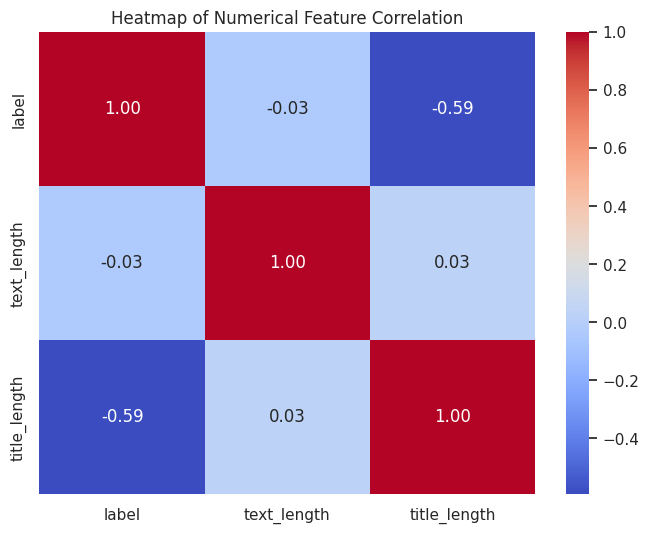

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(merged_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Numerical Feature Correlation")
plt.show()


<ipython-input-18-eb1f53d6402f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_length_per_subject.index, y=avg_length_per_subject.values, palette='viridis')


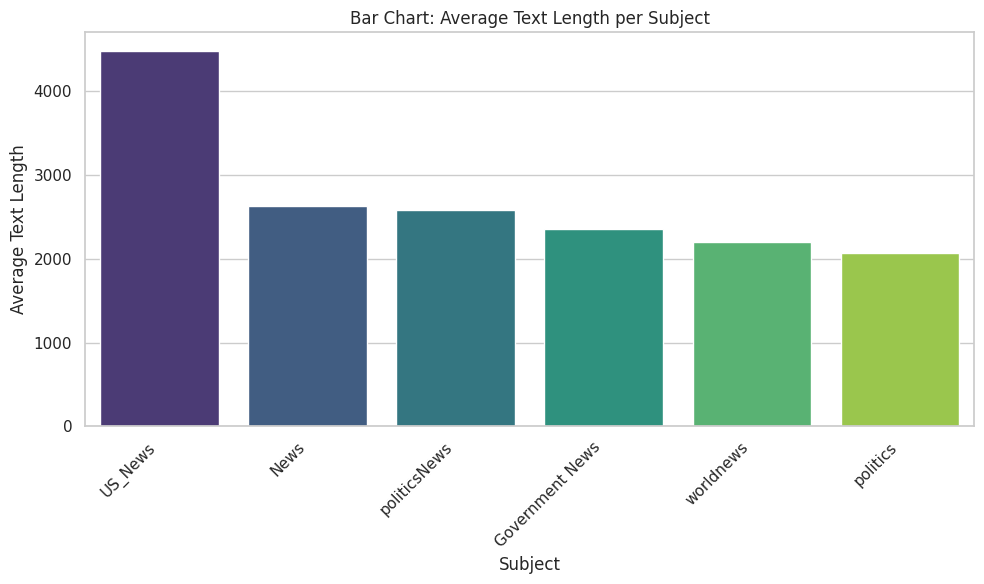

In [ ]:
avg_length_per_subject = filtered_df.groupby('subject')['text_length'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_length_per_subject.index, y=avg_length_per_subject.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Text Length")
plt.xlabel("Subject")
plt.title("Bar Chart: Average Text Length per Subject")
plt.tight_layout()
plt.show()

In [ ]:
filtered_df['word_count'] = filtered_df['text'].apply(lambda x: len(str(x).split()))
filtered_sample = filtered_df.sample(n=100, random_state=42)

<ipython-input-19-af5df592dc71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['word_count'] = filtered_df['text'].apply(lambda x: len(str(x).split()))


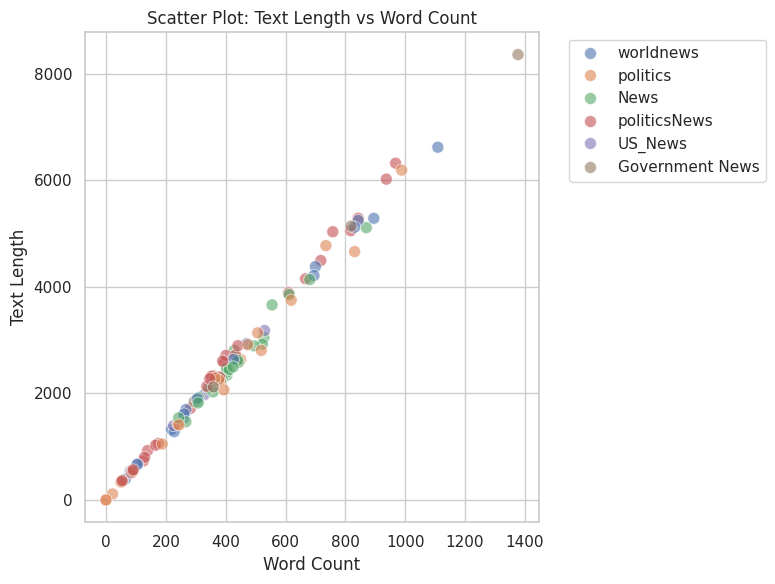

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=filtered_sample, x='word_count', y='text_length', hue='subject', alpha=0.6, s=75)
plt.title("Scatter Plot: Text Length vs Word Count")
plt.xlabel("Word Count")
plt.ylabel("Text Length")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# **DATA PREPARATION**

**Data cleaning**

**Removing dulpicates**

In [ ]:
# Check how many duplicates exist
print("Duplicate Rows Before:", merged_df.duplicated().sum())

# Remove duplicates
merged_df = merged_df.drop_duplicates()

# Verify removal
print("Duplicate Rows After:", merged_df.duplicated().sum())

Duplicate Rows Before: 249
Duplicate Rows After: 0


**Handling missing values**

In [ ]:
# Check missing values
print("Missing Values:\n", merged_df.isnull().sum())
merged_df['subject'] = merged_df['subject'].fillna(merged_df['subject'].mode()[0])
merged_df['date'] = merged_df['date'].fillna('Unknown')

Missing Values:
 title            1
text             1
subject         12
date            12
label            0
text_length      0
title_length     0
dtype: int64


<ipython-input-22-fc59b8d76868>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['subject'] = merged_df['subject'].fillna(merged_df['subject'].mode()[0])


**Removing outliners**

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Keep only the values within bounds
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to each column one by one
filtered_df = remove_outliers_iqr(filtered_df, 'text_length')
filtered_df = remove_outliers_iqr(filtered_df, 'title_length')
filtered_df = remove_outliers_iqr(filtered_df, 'word_count')

# Check the new shape of the dataset
print("Dataset shape after removing outliers:", filtered_df.shape)

Dataset shape after removing outliers: (36369, 8)


**Data encoding**

**One hot encoding**

In [ ]:
# One-Hot Encoding the 'subject' column
encoded_df = pd.get_dummies(filtered_df, columns=['subject'], drop_first=True)

print("Dataset shape after encoding:", encoded_df.shape)
encoded_df.head()

Dataset shape after encoding: (36369, 12)


,title,text,date,label,text_length,title_length,word_count,subject_News,subject_US_News,subject_politics,subject_politicsNews,subject_worldnews
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",1,4727,64,749,False,False,False,True,False
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",1,4125,64,624,False,False,False,True,False
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",1,2825,60,457,False,False,False,True,False
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",1,2485,59,376,False,False,False,True,False
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",1,5240,69,852,False,False,False,True,False


**Data splitting**

**Train and test split**

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target label (y)
X = filtered_df.drop(columns=['label', 'subject'])  # Exclude target and redundant columns
y = filtered_df['label']  # or use 'label' if already encoded

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shape of datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (29095, 6)
Testing set shape: (7274, 6)


**Validation split**

In [ ]:
from sklearn.model_selection import train_test_split

# Features and Target
X = filtered_df.drop(columns=['label', 'subject'])
y = filtered_df['label']  # or 'label' if you're using the original target

# Step 1: Split into Train+Val and Test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Split Train+Val into Train and Validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

# Show shapes
print("Training Set Shape   :", X_train.shape)
print("Validation Set Shape :", X_val.shape)
print("Testing Set Shape    :", X_test.shape)


Training Set Shape   : (21821, 6)
Validation Set Shape : (7274, 6)
Testing Set Shape    : (7274, 6)


**Feature Engineering**

**Correlation matrix**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check your actual available columns first
print(filtered_df.columns)

# Use only available numeric columns
numeric_cols = ['title_length', 'word_count', 'subject_encoded']

# Compute and plot correlation matrix
corr_matrix = filtered_df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


Index(['title', 'text', 'subject', 'date', 'label', 'text_length',
       'title_length', 'word_count'],
      dtype='object')


KeyError: "['subject_encoded'] not in index"

**DATA CLEANING**

In [ ]:
import pandas as pd

# Load both datasets
df_fake = pd.read_csv("/content/Fake.csv")
df_true = pd.read_csv("/content/True.csv")

# Check initial sizes
# print(f"Fake News Records: {len(df_fake)}")
# print(f"True News Records: {len(df_true)}")

# Find the minimum count to balance
min_count = min(len(df_fake), len(df_true))

# Take equal number of records from both
df_fake = df_fake.sample(n=min_count, random_state=42)
df_true = df_true.sample(n=min_count, random_state=42)

print(f"Balanced Fake News Records: {len(df_fake)}")
print(f"Balanced True News Records: {len(df_true)}")

# Add a label column
df_fake["label"] = "fake"
df_true["label"] = "true"

# Combine datasets
df_combined = pd.concat([df_fake, df_true], axis=0).reset_index(drop=True)

# Save combined dataset
df_combined.to_csv("balanced_combined_data.csv", index=False)

print("Dataset balanced and combined successfully!")
print(f"Total Records: {len(df_combined)}")


**Handling missing values**

In [ ]:
import pandas as pd

# Load the combined dataset
df = pd.read_csv("/content/balanced_combined_data.csv")

# Print total records before cleaning
print(f"Total Records Before Cleaning: {len(df)}")

# Fill missing values with an empty string
df = df.fillna("")

# Print missing values after handling
missing_values_after = df.isnull().sum().sum()
print(f" Total Missing Values After Handling: {missing_values_after}")

# Print total records after handling missing values
print(f"Total Records After Cleaning: {len(df)}")

# Save cleaned dataset
df.to_csv("cleaned_data.csv", index=False)


**Removing Duplicates**

In [ ]:
# Check for duplicate records
duplicates_before = df.duplicated().sum()
print(f"Duplicates Before Removal: {duplicates_before}")

# Remove duplicates
df = df.drop_duplicates()

# Check duplicates after removal
duplicates_after = df.duplicated().sum()
print(f"Duplicates After Removal: {duplicates_after}")

# Save cleaned dataset
df.to_csv("cleaned_data.csv", index=False)


**Handling Outliers**

In [ ]:
import numpy as np
from scipy.stats import zscore

# Select numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Compute Z-scores
df[num_cols] = df[num_cols].apply(zscore)

# Remove outliers where Z-score > 3
df_no_outliers = df[(df[num_cols] < 3).all(axis=1)]

print(f"Records Before Outlier Removal: {len(df)}")
print(f"Records After Outlier Removal: {len(df_no_outliers)}")

# Save final cleaned dataset
df_no_outliers.to_csv("cleaned_data.csv", index=False)


In [ ]:
import pandas as pd

# Load the cleaned dataset
df_cleaned = pd.read_csv("final_cleaned_data.csv", dtype=str, low_memory=False)

# Check initial shape before removing duplicates
print(f"Initial Shape: {df_cleaned.shape}")

# Drop duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Check shape after removing duplicates
print(f"Shape After Removing Duplicates: {df_cleaned.shape}")

# Save the final cleaned dataset
df_cleaned.to_csv("final_cleaned_data_no_duplicates.csv", index=False)

# Display first 5 rows
print("\nFirst 5 Records After Removing Duplicates:\n", df_cleaned.head())


**Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Load the cleaned dataset without duplicates
df_cleaned = pd.read_csv("final_cleaned_data_no_duplicates.csv", dtype=str, low_memory=False)

# Identify categorical columns (excluding the target column)
categorical_cols = df_cleaned.select_dtypes(include=["object"]).columns.tolist()

# Apply Label Encoding to categorical columns
encoder = LabelEncoder()

for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].astype(str)  # Ensure all values are strings
    df_cleaned[col] = encoder.fit_transform(df_cleaned[col])

# Save the encoded dataset
df_cleaned.to_csv("final_encoded_data.csv", index=False)

# Display first 5 rows after encoding
print("Encoding Completed Successfully!")
print("\nFirst 5 Records After Encoding:\n", df_cleaned.head())

# Display column data types
print("\nUpdated Column Data Types:\n", df_cleaned.dtypes)


**Data Splitting**

In [ ]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# Load datasets with low_memory=False to avoid dtype warnings
true_df = pd.read_csv("/content/True.csv", encoding='utf-8', low_memory=False)
fake_df = pd.read_csv("/content/Fake.csv", encoding='utf-8', low_memory=False)

# # Print column names to check if required columns exist
# print("True News Columns:", true_df.columns)
# print("Fake News Columns:", fake_df.columns)

# Define relevant columns (handle missing columns gracefully)
columns_to_keep = ['title', 'text', 'subject', 'date']
true_df = true_df[[col for col in columns_to_keep if col in true_df.columns]]
fake_df = fake_df[[col for col in columns_to_keep if col in fake_df.columns]]

# Add labels: 1 for Fake, 0 for Real
fake_df["label"] = 1
true_df["label"] = 0

# Print original dataset sizes
print(f"Original Fake News Records: {len(fake_df)}")
print(f"Original Real News Records: {len(true_df)}")

# Balance dataset by downsampling Fake news to match Real news count
fake_df_balanced = resample(fake_df, replace=False, n_samples=len(true_df), random_state=42)

# Merge both datasets and shuffle
balanced_df = pd.concat([fake_df_balanced, true_df]).sample(frac=1, random_state=42).reset_index(drop=True)

# Print balanced dataset size
print(f"\nBalanced Dataset Size: {len(balanced_df)}")
print(balanced_df['label'].value_counts())  # Verify equal class distribution

# Split dataset into Training (80%) and Testing (20%)
train_df, test_df = train_test_split(balanced_df, test_size=0.2, random_state=42, stratify=balanced_df["label"])

# Print training and testing set sizes
print(f"\nTraining Set: {len(train_df)} records")
print(f"Testing Set: {len(test_df)} records")

# Save the balanced dataset (Optional)
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

print("\nDataset processing complete!")


# **Final Implementation**

In [ ]:
!pip install transformers
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 8.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from transformers import AutoTokenizer, AutoModel
import torch
from deap import base, creator, tools, algorithms
import random
import warnings
warnings.filterwarnings('ignore')

In [ ]:
fake = pd.read_csv('/content/Fake.csv')
true = pd.read_csv('/content/True.csv')

In [ ]:
fake_sample = fake.sample(n=500, random_state=42)
true_sample = true.sample(n=500, random_state=42)

fake_sample['label'] = 0
true_sample['label'] = 1

data = pd.concat([fake_sample, true_sample]).reset_index(drop=True)

In [ ]:
data['title'] = data['title'].fillna('')
data['text'] = data['text'].fillna('')

# Combine title and text
data['text'] = data['title'] + ' ' + data['text']

# Lowercasing
def preprocess(text):
    return text.lower()

data['text'] = data['text'].apply(preprocess)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
model = AutoModel.from_pretrained('distilbert-base-uncased')

def get_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

embeddings = np.vstack([get_embedding(text) for text in data['text']])

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
pca = PCA(n_components=50)
pca_embeddings = pca.fit_transform(embeddings)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pca_embeddings, data['label'], test_size=0.2, random_state=42)

In [ ]:
def eval_individual(individual):
    if sum(individual) == 0:
        return 0,
    selected_features = [index for index, bit in enumerate(individual) if bit == 1]
    X_selected = X_train[:, selected_features]
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_selected, y_train)
    predictions = clf.predict(X_selected)
    return accuracy_score(y_train, predictions),


In [ ]:
num_features = X_train.shape[1]

creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register('attr_bool', random.randint, 0, 1)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_bool, n=num_features)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)
toolbox.register('evaluate', eval_individual)
toolbox.register('mate', tools.cxTwoPoint)
toolbox.register('mutate', tools.mutFlipBit, indpb=0.05)
toolbox.register('select', tools.selTournament, tournsize=3)

In [ ]:
population = toolbox.population(n=20)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)

gen	nevals
0  	20    
1  	15    
2  	11    
3  	16    
4  	12    
5  	13    
6  	11    
7  	12    
8  	9     
9  	11    
10 	11    


([[1,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   0,
   0,
   1,
   0,
   1,
   1,
   0,
   0,
   0,
   0,
   0,
   1,
   1,
   0,
   1,
   0,
   0,
   1,
   0,
   1,
   1,
   1,
   0,
   0,
   1,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   1,
   1,
   1,
   0,
   1,
   1,
   0,
   0,
   1,
   1],
  [1,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   0,
   0,
   1,
   0,
   1,
   1,
   0,
   0,
   0,
   0,
   0,
   1,
   1,
   0,
   1,
   0,
   0,
   1,
   0,
   1,
   1,
   1,
   0,
   0,
   1,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   1,
   1,
   1,
   0,
   1,
   1,
   0,
   0,
   1,
   1],
  [1,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   0,
   0,
   1,
   0,
   1,
   1,
   0,
   0,
   0,
   0,
   0,
   1,
   1,
   0,
   1,
   0,
   0,
   1,
   0,
   1,
   1,
   1,
   0,
   0,
   1,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   1,
   1,
   1,
   0,
   1,
   1,
   0,
   0,
   1,
   1],
  [1,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   0,
   0,
   1,
   0,
   1,
   1,
   0,
   0,
 

In [ ]:
best_individual = tools.selBest(population, k=1)[0]
selected_features = [index for index, bit in enumerate(best_individual) if bit == 1]

# Test classifier with selected features
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train[:, selected_features], y_train)
y_pred = clf.predict(X_test[:, selected_features])

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.93        96
           1       0.91      0.98      0.94       104

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

Confusion Matrix:
[[ 86  10]
 [  2 102]]
Accuracy: 0.94


gen	nevals	max    	avg     
0  	20    	0.96625	0.775938
1  	16    	0.96625	0.882938
2  	11    	0.96625	0.933625
3  	13    	0.965  	0.9515  
4  	11    	0.97   	0.958375
5  	15    	0.97125	0.961938
6  	15    	0.97125	0.966187
7  	13    	0.97125	0.969187
8  	13    	0.9725 	0.970688
9  	11    	0.97125	0.970875
10 	13    	0.975  	0.971063
11 	12    	0.975  	0.970375
12 	14    	0.975  	0.971188
13 	9     	0.975  	0.972   
14 	13    	0.97625	0.9605  
15 	11    	0.97625	0.972   
16 	15    	0.97625	0.97475 
17 	14    	0.97625	0.9735  
18 	16    	0.97625	0.974125
19 	15    	0.97625	0.975562
20 	14    	0.97625	0.960625


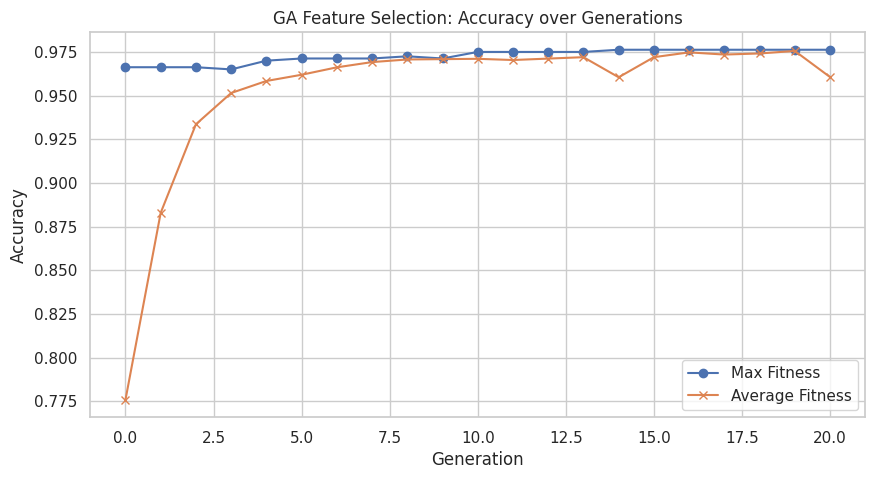

In [ ]:
import matplotlib.pyplot as plt

# Define population and statistics
population = toolbox.population(n=20)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register('max', np.max)
stats.register('avg', np.mean)

# Run GA
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2,
                                          ngen=20, stats=stats, halloffame=hof, verbose=True)

# Extract stats
gen = logbook.select("gen")
max_fitness = logbook.select("max")
avg_fitness = logbook.select("avg")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(gen, max_fitness, label='Max Fitness', marker='o')
plt.plot(gen, avg_fitness, label='Average Fitness', marker='x')
plt.xlabel("Generation")
plt.ylabel("Accuracy")
plt.title("GA Feature Selection: Accuracy over Generations")
plt.legend()
plt.grid(True)
plt.show()

# **Code**

In [ ]:
# Install necessary packages
!pip install transformers
!pip install deap

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from transformers import AutoTokenizer, AutoModel
import torch
from deap import base, creator, tools, algorithms
import random
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load Dataset (Assuming you have uploaded the datasets in Colab)
fake = pd.read_csv('/content/Fake.csv')
true = pd.read_csv('/content/True.csv')

# Step 2: Balance the dataset (500 Fake + 500 True)
fake_sample = fake.sample(n=500, random_state=42)
true_sample = true.sample(n=500, random_state=42)
data = pd.concat([fake_sample, true_sample]).reset_index(drop=True)

fake_sample['label'] = 0
true_sample['label'] = 1

# Now concatenate
data = pd.concat([fake_sample, true_sample]).reset_index(drop=True)

# Step 3: Text Preprocessing (keep it simple)

# Handle missing values
data['title'] = data['title'].fillna('')
data['text'] = data['text'].fillna('')

# Combine title and text
data['text'] = data['title'] + ' ' + data['text']

# Lowercase
def preprocess(text):
    return text.lower()

data['text'] = data['text'].apply(preprocess)

# Step 4: BERT Embeddings (using DistilBERT)
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
model = AutoModel.from_pretrained('distilbert-base-uncased')

# Function to get embeddings
def get_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

embeddings = np.vstack([get_embedding(text) for text in data['text']])

# Step 5: Apply PCA
pca = PCA(n_components=50)
pca_embeddings = pca.fit_transform(embeddings)

# Step 6: Genetic Algorithm for Feature Selection
# Define fitness function
def eval_individual(individual):
    if sum(individual) == 0:
        return 0,
    selected_features = [index for index, bit in enumerate(individual) if bit == 1]
    X_selected = X_train[:, selected_features]
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_selected, y_train)
    predictions = clf.predict(X_selected)
    return accuracy_score(y_train, predictions),

# Prepare data for GA
X_train, X_test, y_train, y_test = train_test_split(pca_embeddings, data['label'], test_size=0.2, random_state=42)

num_features = X_train.shape[1]

creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register('attr_bool', random.randint, 0, 1)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_bool, n=num_features)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)
toolbox.register('evaluate', eval_individual)
toolbox.register('mate', tools.cxTwoPoint)
toolbox.register('mutate', tools.mutFlipBit, indpb=0.05)
toolbox.register('select', tools.selTournament, tournsize=3)

population = toolbox.population(n=20)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=False)

best_individual = tools.selBest(population, k=1)[0]
selected_features = [index for index, bit in enumerate(best_individual) if bit == 1]

# Step 7: Train final model with selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_selected, y_train)
predictions = clf.predict(X_test_selected)

# Step 8: Evaluation
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.935
Confusion Matrix:
 [[ 86  10]
 [  3 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93        96
           1       0.91      0.97      0.94       104

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



In [ ]:
# Step 7: Evaluate the best individual on test data

# Get the best individual
best_individual = tools.selBest(population, k=1)[0]
selected_features = [index for index, bit in enumerate(best_individual) if bit == 1]

# Check if at least one feature is selected
if selected_features:
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]

    # Train final classifier
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train_selected, y_train)
    predictions = clf.predict(X_test_selected)

    # Evaluate
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Accuracy Score:", accuracy_score(y_test, predictions))
else:
    print("No features were selected by the genetic algorithm.")


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93        96
           1       0.91      0.97      0.94       104

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200

Confusion Matrix:
 [[ 86  10]
 [  3 101]]
Accuracy Score: 0.935


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

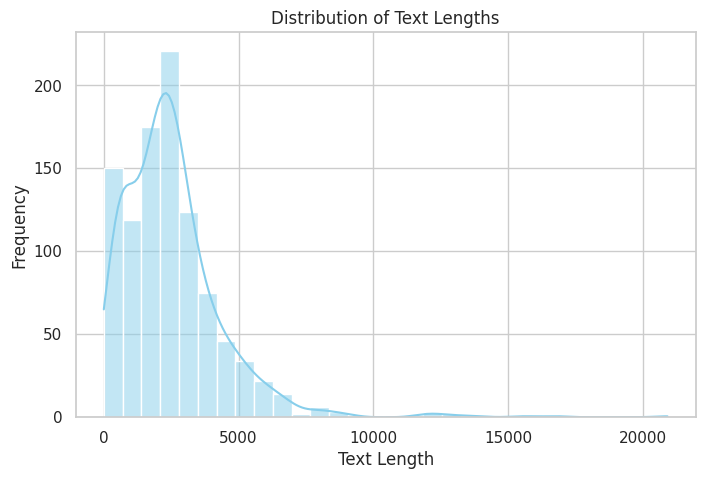

In [ ]:
data['text_length'] = data['text'].apply(len)

plt.figure(figsize=(8, 5))
sns.histplot(data['text_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

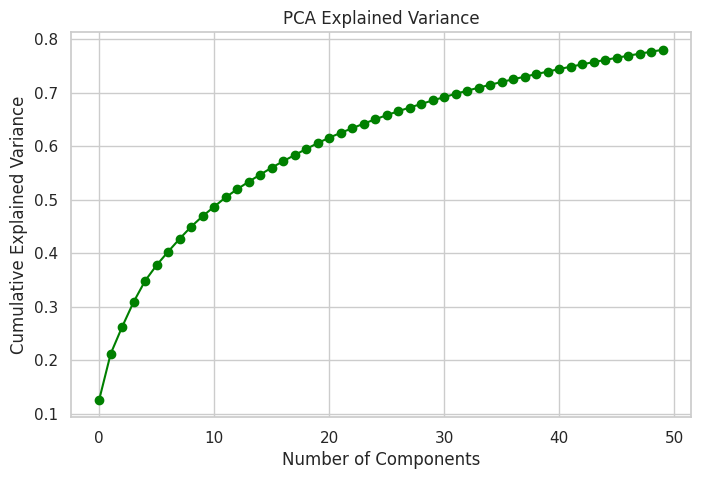

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='green')
plt.title('PCA Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

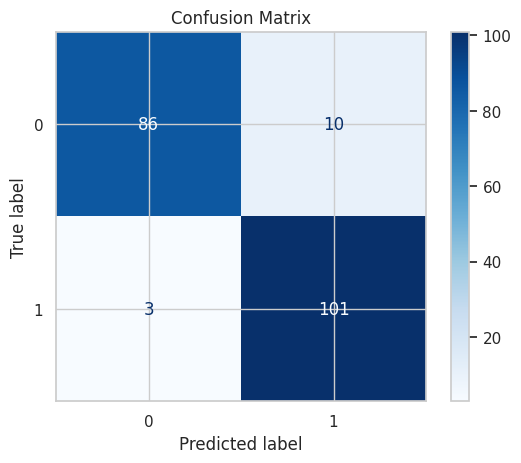

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Train on selected features
selected_features = [index for index, bit in enumerate(best_individual) if bit == 1]
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train[:, selected_features], y_train)
y_pred = clf.predict(X_test[:, selected_features])

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


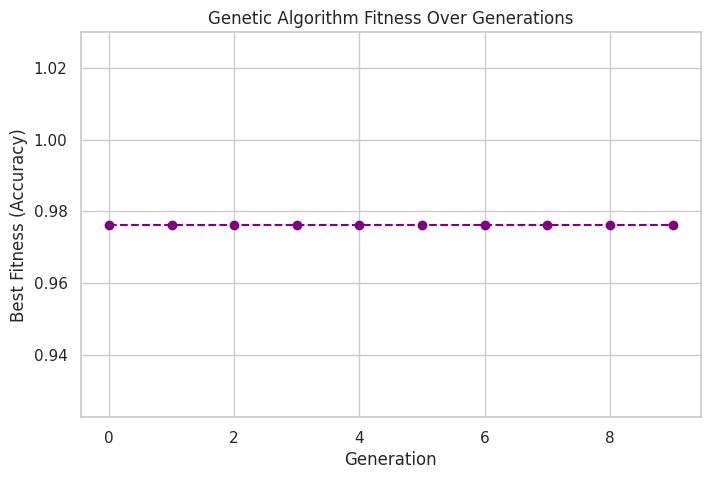

In [ ]:
fitness_history = []

def record_fitness(population):
    fits = [ind.fitness.values[0] for ind in population]
    fitness_history.append(max(fits))

# Run GA with logging
for gen in range(10):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = list(map(toolbox.evaluate, offspring))
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    record_fitness(population)

# Plot fitness history
plt.figure(figsize=(8, 5))
plt.plot(fitness_history, marker='o', linestyle='--', color='purple')
plt.title('Genetic Algorithm Fitness Over Generations')
plt.xlabel('Generation')
plt.ylabel('Best Fitness (Accuracy)')
plt.grid(True)
plt.show()

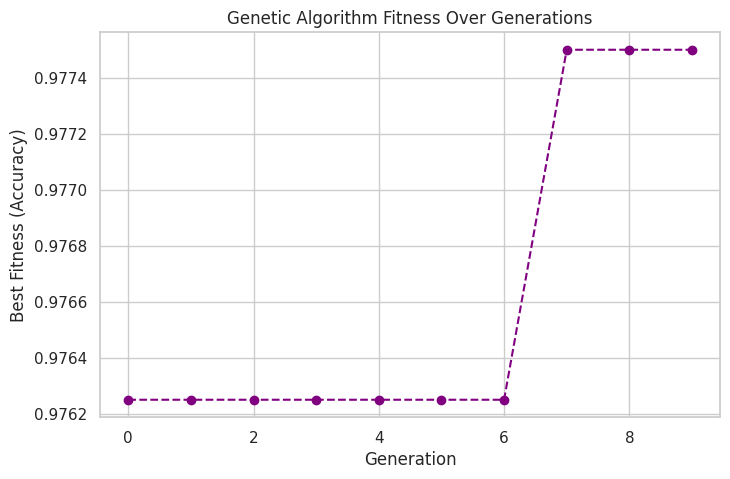

In [ ]:
fitness_history = []

def record_fitness(population):
    fits = [ind.fitness.values[0] for ind in population]
    fitness_history.append(max(fits))

# Run GA with logging
for gen in range(10):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = list(map(toolbox.evaluate, offspring))
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    record_fitness(population)

# Plot fitness history
plt.figure(figsize=(8, 5))
plt.plot(fitness_history, marker='o', linestyle='--', color='purple')
plt.title('Genetic Algorithm Fitness Over Generations')
plt.xlabel('Generation')
plt.ylabel('Best Fitness (Accuracy)')
plt.grid(True)
plt.show()

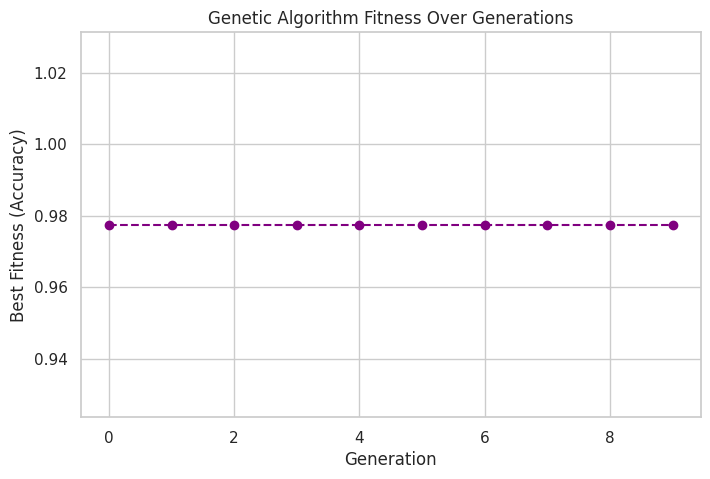

In [ ]:
fitness_history = []

def record_fitness(population):
    fits = [ind.fitness.values[0] for ind in population]
    fitness_history.append(max(fits))

# Run GA with logging
for gen in range(10):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = list(map(toolbox.evaluate, offspring))
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    record_fitness(population)

# Plot fitness history
plt.figure(figsize=(8, 5))
plt.plot(fitness_history, marker='o', linestyle='--', color='purple')
plt.title('Genetic Algorithm Fitness Over Generations')
plt.xlabel('Generation')
plt.ylabel('Best Fitness (Accuracy)')
plt.grid(True)
plt.show()

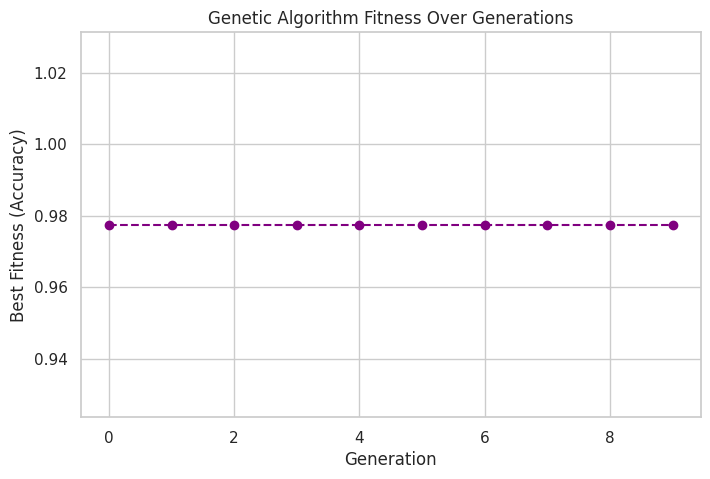

In [ ]:
fitness_history = []

def record_fitness(population):
    fits = [ind.fitness.values[0] for ind in population]
    fitness_history.append(max(fits))

# Run GA with logging
for gen in range(10):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = list(map(toolbox.evaluate, offspring))
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    record_fitness(population)

# Plot fitness history
plt.figure(figsize=(8, 5))
plt.plot(fitness_history, marker='o', linestyle='--', color='purple')
plt.title('Genetic Algorithm Fitness Over Generations')
plt.xlabel('Generation')
plt.ylabel('Best Fitness (Accuracy)')
plt.grid(True)
plt.show()

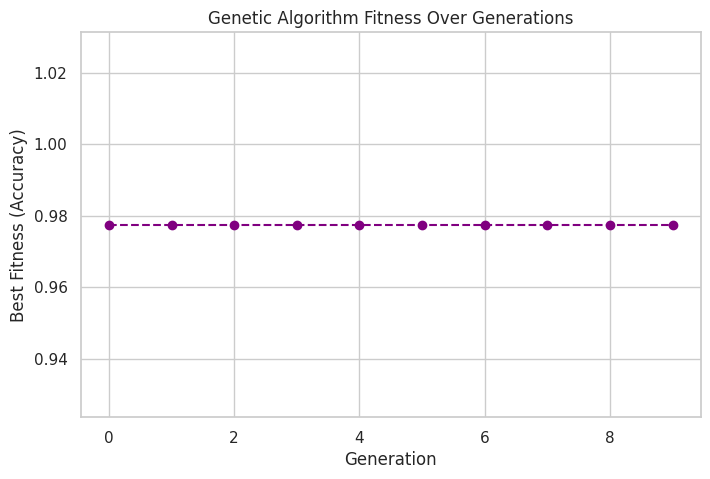

In [ ]:
fitness_history = []

def record_fitness(population):
    fits = [ind.fitness.values[0] for ind in population]
    fitness_history.append(max(fits))

# Run GA with logging
for gen in range(10):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = list(map(toolbox.evaluate, offspring))
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    record_fitness(population)

# Plot fitness history
plt.figure(figsize=(8, 5))
plt.plot(fitness_history, marker='o', linestyle='--', color='purple')
plt.title('Genetic Algorithm Fitness Over Generations')
plt.xlabel('Generation')
plt.ylabel('Best Fitness (Accuracy)')
plt.grid(True)
plt.show()

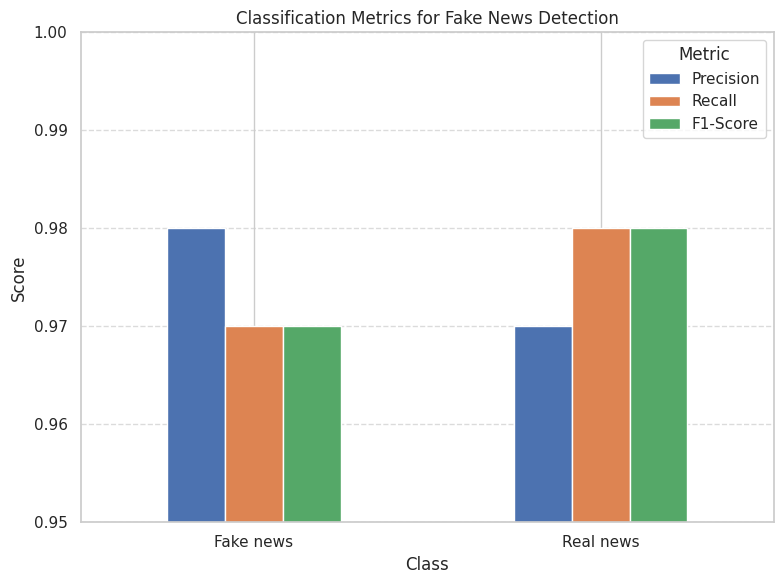

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the table
data = {
    'Class': ['Fake news', 'Real news'],
    'Precision': [0.98, 0.97],
    'Recall': [0.97, 0.98],
    'F1-Score': [0.97, 0.98],
}

# Convert to DataFrame
df = pd.DataFrame(data)
df.set_index('Class', inplace=True)

# Plotting
ax = df.plot(kind='bar', figsize=(8, 6))
plt.title('Classification Metrics for Fake News Detection')
plt.ylabel('Score')
plt.ylim(0.95, 1.00)
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


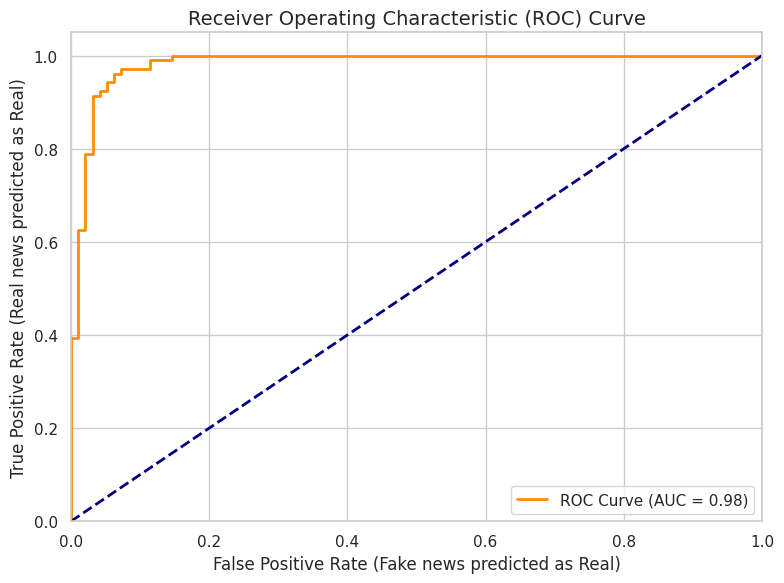

In [ ]:
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict probabilities for test set
y_probs = clf.predict_proba(X_test_selected)[:, 1]  # Probability of class 1 (Real news)

# Calculate FPR, TPR
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line

# Custom axis labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Fake news predicted as Real)', fontsize=12)
plt.ylabel('True Positive Rate (Real news predicted as Real)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


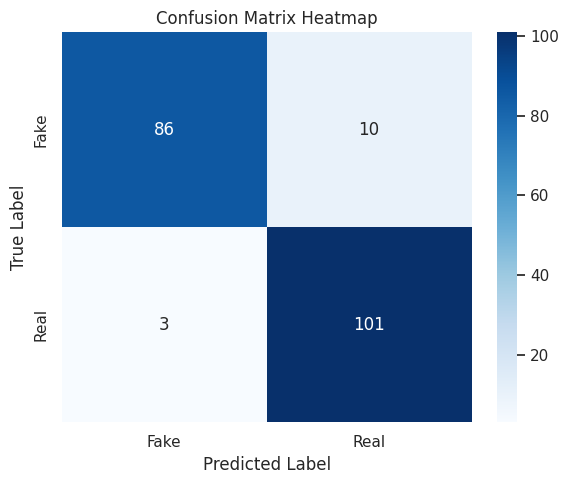

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ["Fake", "Real"]

# Create heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.tight_layout()
plt.show()


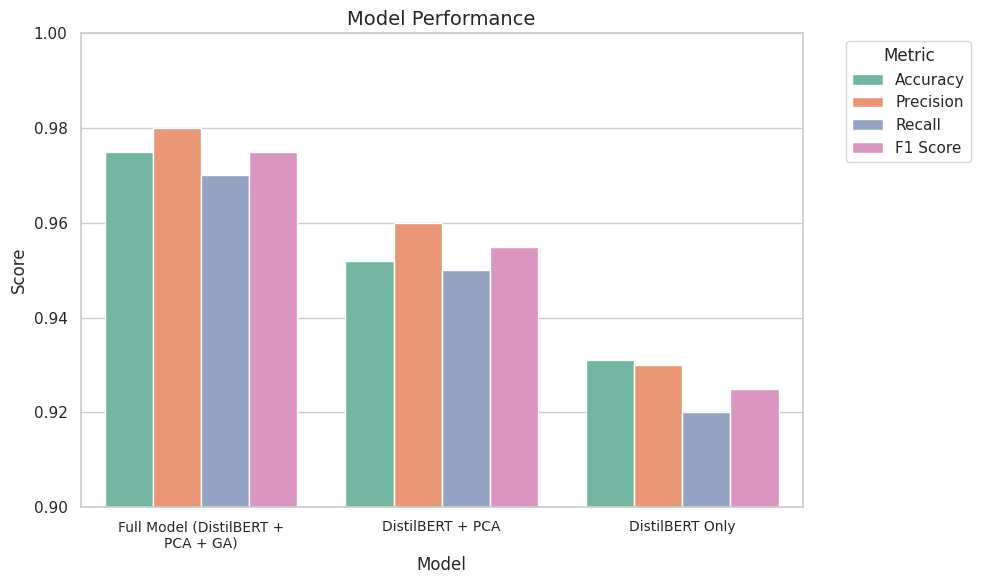

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import textwrap

# Define performance metrics for different configurations
data = {
    'Configuration': [
        'Full Model (DistilBERT + PCA + GA)',
        'DistilBERT + PCA',
        'DistilBERT Only'
    ],
    'Accuracy': [0.975, 0.952, 0.931],
    'Precision': [0.98, 0.96, 0.93],
    'Recall': [0.97, 0.95, 0.92],
    'F1 Score': [0.975, 0.955, 0.925]
}

df = pd.DataFrame(data)

# Wrap long x-axis labels
df['Configuration'] = df['Configuration'].apply(lambda x: '\n'.join(textwrap.wrap(x, 25)))

# Melt for seaborn barplot
df_melted = df.melt(id_vars='Configuration', var_name='Metric', value_name='Score')

# Set plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Configuration', y='Score', hue='Metric', palette='Set2')

plt.title("Model Performance", fontsize=14)
plt.ylim(0.9, 1.0)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


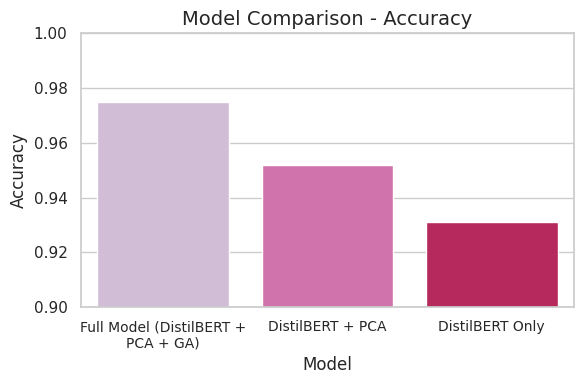

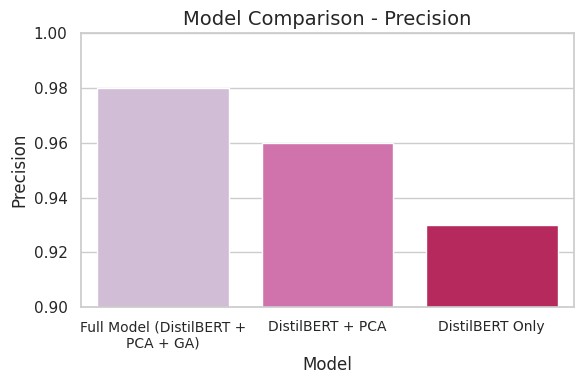

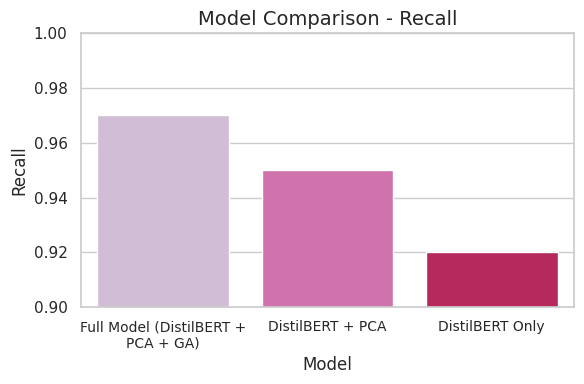

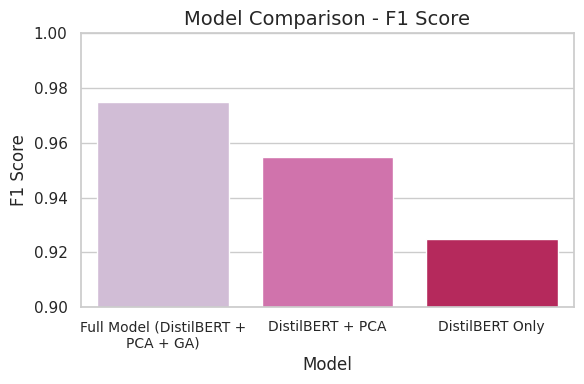

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import textwrap

# Define performance metrics for different configurations
data = {
    'Configuration': [
        'Full Model (DistilBERT + PCA + GA)',
        'DistilBERT + PCA',
        'DistilBERT Only'
    ],
    'Accuracy': [0.975, 0.952, 0.931],
    'Precision': [0.98, 0.96, 0.93],
    'Recall': [0.97, 0.95, 0.92],
    'F1 Score': [0.975, 0.955, 0.925]
}

df = pd.DataFrame(data)

# Wrap long x-axis labels
df['Configuration'] = df['Configuration'].apply(lambda x: '\n'.join(textwrap.wrap(x, 25)))

# Set plot style
sns.set(style="whitegrid")

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plot separate barplots for each metric
for metric in metrics:
    plt.figure(figsize=(6,4))
    sns.barplot(data=df, x='Configuration', y=metric, palette='PuRd')
    plt.title(f'Model Comparison - {metric}', fontsize=14)
    plt.ylim(0.9, 1.0)
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.xticks(rotation=0, ha='center', fontsize=10)
    plt.tight_layout()
    plt.show()


# **Final**

In [ ]:
!pip install transformers deap gradio joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.3 MB/s eta 0:00:00


In [ ]:
# Install required packages if needed
!pip install transformers deap gradio

# === IMPORTS ===
import pandas as pd
import numpy as np
import torch
import random
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from transformers import AutoTokenizer, AutoModel
from deap import base, creator, tools, algorithms
import warnings
warnings.filterwarnings('ignore')

# === STEP 1: LOAD AND PREPROCESS DATA ===
fake = pd.read_csv('/content/Fake.csv')
true = pd.read_csv('/content/True.csv')

fake_sample = fake.sample(n=500, random_state=42)
true_sample = true.sample(n=500, random_state=42)

fake_sample['label'] = 0
true_sample['label'] = 1

data = pd.concat([fake_sample, true_sample]).reset_index(drop=True)
data['title'] = data['title'].fillna('')
data['text'] = data['text'].fillna('')
data['text'] = (data['title'] + ' ' + data['text']).str.lower()

# === STEP 2: BERT EMBEDDINGS ===
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
model = AutoModel.from_pretrained('distilbert-base-uncased')

def get_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

print("Generating BERT embeddings...")
embeddings = np.vstack([get_embedding(t) for t in data['text']])

# === STEP 3: PCA REDUCTION ===
pca = PCA(n_components=50)
pca_embeddings = pca.fit_transform(embeddings)

# === STEP 4: GENETIC ALGORITHM FEATURE SELECTION ===
X_train, X_test, y_train, y_test = train_test_split(pca_embeddings, data['label'], test_size=0.2, random_state=42)

def eval_individual(ind):
    if sum(ind) == 0:
        return 0.,
    selected = [i for i, bit in enumerate(ind) if bit == 1]
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train[:, selected], y_train)
    preds = clf.predict(X_train[:, selected])
    return accuracy_score(y_train, preds),

num_features = X_train.shape[1]

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=num_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", eval_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

print("Running Genetic Algorithm...")
population = toolbox.population(n=20)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=False)

best = tools.selBest(population, k=1)[0]
selected_features = [i for i, bit in enumerate(best) if bit == 1]

# === STEP 5: FINAL MODEL TRAINING ===
X_train_sel = X_train[:, selected_features]
X_test_sel = X_test[:, selected_features]

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_sel, y_train)
preds = clf.predict(X_test_sel)

print("Model Performance:")
print("Accuracy:", accuracy_score(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
print("Classification Report:\n", classification_report(y_test, preds))

# === STEP 6: GRADIO APP===
def classify_news(text):
    text = text.lower()
    embedding = get_embedding(text)
    reduced = pca.transform([embedding])
    selected = reduced[:, selected_features]
    pred = clf.predict(selected)[0]
    return "Fake News" if pred == 0 else "Real News"

iface = gr.Interface(fn=classify_news,
                     inputs=gr.Textbox(lines=5, placeholder="Enter news article title and content..."),
                     outputs="text",
                     title="Fake News Detection",
                     description="Enter a news article and the model will predict whether it's real or fake.")
iface.launch()


Generating BERT embeddings...
Running Genetic Algorithm...
Model Performance:
Accuracy: 0.95
Confusion Matrix:
 [[ 88   8]
 [  2 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        96
           1       0.93      0.98      0.95       104

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f1f98d0652abd1da9c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the worki

In [ ]:
import pandas as pd
import numpy as np
import torch
import random
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from transformers import AutoTokenizer, AutoModel
from deap import base, creator, tools, algorithms
import warnings
warnings.filterwarnings('ignore')


In [ ]:
fake = pd.read_csv('/content/Fake.csv')
true = pd.read_csv('/content/True.csv')

fake_sample = fake.sample(n=500, random_state=42)
true_sample = true.sample(n=500, random_state=42)

fake_sample['label'] = 0
true_sample['label'] = 1

data = pd.concat([fake_sample, true_sample]).reset_index(drop=True)
data['title'] = data['title'].fillna('')
data['text'] = data['text'].fillna('')
data['text'] = (data['title'] + ' ' + data['text']).str.lower()
print(data.head())

                                               title  \
0   Bigots Upset Their Daughter Was Taught World ...   
1  BREAKING FL VOTER FRAUD ALERT: â€œTens Of Thou...   
2  FRONT-ROW FELON! Americans Are Stunned To See ...   
3  DETROIT FREE PRESS EDITOR Calls For Gruesome M...   
4   WATCH: Van Jones Epically SCOLDS Trump Suppor...   

                                                text          subject  \
0   bigots upset their daughter was taught world ...             News   
1  breaking fl voter fraud alert: â€œtens of thou...         politics   
2  front-row felon! americans are stunned to see ...         politics   
3  detroit free press editor calls for gruesome m...  Government News   
4   watch: van jones epically scolds trump suppor...             News   

               date Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0  January 31, 2016        NaN        NaN        NaN        NaN        NaN   
1       Nov 2, 2016        NaN        NaN        NaN        NaN     

In [ ]:
# === STEP 2: DistilBERT EMBEDDINGS ===
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
model = AutoModel.from_pretrained('distilbert-base-uncased')

def get_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

print("Generating BERT embeddings...")
embeddings = np.vstack([get_embedding(t) for t in data['text']])

# Display a few original embeddings
print("\nSample DistilBERT Embedding Vectors (first 3 samples):")
for i in range(3):
    print(f"Sample {i+1}:", embeddings[i][:10], "...")  # Show first 10 dimensions

Generating BERT embeddings...

Sample DistilBERT Embedding Vectors (first 3 samples):
Sample 1: [-0.15139854  0.02617197 -0.04614246 -0.02195487  0.16457422 -0.0719398
  0.32442123  0.409518    0.10022858  0.06718487] ...
Sample 2: [ 0.09386631 -0.10846558  0.2762276   0.05405775  0.35493815 -0.1932007
  0.06972884  0.3064065  -0.17393373  0.0083444 ] ...
Sample 3: [-0.18307827 -0.13461569  0.13524692  0.04482851  0.18336779 -0.1855308
 -0.02608729  0.15820087 -0.00900509 -0.06348592] ...


In [ ]:
# === STEP 3: PCA REDUCTION ===
pca = PCA(n_components=50)
pca_embeddings = pca.fit_transform(embeddings)

# Display PCA-reduced vectors
print("\nSample PCA-Reduced Vectors (first 3 samples):")
for i in range(3):
    print(f"Sample {i+1}:", pca_embeddings[i][:10], "...")  # Show first 10 components



Sample PCA-Reduced Vectors (first 3 samples):
Sample 1: [ 0.48188314 -1.0059786   0.522819   -0.17684601 -0.62005806 -0.0660489
 -0.39302614  0.30895722  0.32952407 -0.4602007 ] ...
Sample 2: [ 1.1793404  -0.32379162 -0.8024506   1.3896798  -0.23902398 -0.730991
  0.0442084  -0.47868314  0.00898467  0.00909634] ...
Sample 3: [ 0.5546939   0.15592495  0.7358413   0.24224083 -0.08032767 -0.12233127
  0.31837848  0.3295384  -0.39050457  0.02757674] ...


In [ ]:
# === STEP 4: GENETIC ALGORITHM FEATURE SELECTION ===
X_train, X_test, y_train, y_test = train_test_split(pca_embeddings, data['label'], test_size=0.2, random_state=42)

def eval_individual(ind):
    if sum(ind) == 0:
        return 0.,
    selected = [i for i, bit in enumerate(ind) if bit == 1]
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train[:, selected], y_train)
    preds = clf.predict(X_train[:, selected])
    return accuracy_score(y_train, preds),

num_features = X_train.shape[1]

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=num_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", eval_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

print("Running Genetic Algorithm...")
population = toolbox.population(n=20)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=False)

best = tools.selBest(population, k=1)[0]
selected_features = [i for i, bit in enumerate(best) if bit == 1]

# Show selected feature indices
print("\nSelected Feature Indices by Genetic Algorithm:", selected_features)

# Apply GA selection to a few PCA vectors
print("\nSample Vectors After GA Feature Selection (first 3 samples):")
X_pca_selected = X_train[:, selected_features]
for i in range(3):
    print(f"Sample {i+1}:", X_pca_selected[i])

Running Genetic Algorithm...

Selected Feature Indices by Genetic Algorithm: [0, 1, 2, 3, 5, 6, 7, 9, 12, 13, 14, 16, 17, 21, 22, 24, 25, 26, 27, 28, 30, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 49]

Sample Vectors After GA Feature Selection (first 3 samples):
Sample 1: [ 1.2304342  -0.38740313 -0.94434726  0.68653005 -0.10507871 -0.03186266
  0.3954081   0.09019209 -0.42688015 -0.24195656 -0.57482404  0.21596064
 -0.00884159  0.15765138 -0.22174595  0.0982885   0.21385267 -0.11505835
  0.2583779   0.02739813 -0.14225788  0.09139117 -0.24401306 -0.06224753
  0.09690256  0.24081612  0.00588924 -0.24878986  0.06394703  0.03149175
 -0.0119132   0.01436137  0.29141316  0.0736357 ]
Sample 2: [-0.7708423  -0.28887913 -0.3461184   0.13528037  0.55858403  0.16500811
  0.953078   -0.29214406  0.05987842  0.1790166   0.7323002  -0.35298464
 -0.03184089  0.28866816  0.65046656 -0.14461894  0.38956067  0.1443962
 -0.00204552  0.22518133  0.06043874 -0.11516206 -0.0874385   0.18672119
 -0.06

In [ ]:
# === STEP 5: FINAL MODEL TRAINING ===
X_train_sel = X_train[:, selected_features]
X_test_sel = X_test[:, selected_features]

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_sel, y_train)
preds = clf.predict(X_test_sel)

print("Model Performance:")
print("Accuracy:", accuracy_score(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
print("Classification Report:\n", classification_report(y_test, preds))


Model Performance:
Accuracy: 0.94
Confusion Matrix:
 [[ 88   8]
 [  4 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        96
           1       0.93      0.96      0.94       104

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [ ]:
# === STEP 6: GRADIO APP ===
def classify_news(text):
    text = text.lower()
    embedding = get_embedding(text)
    reduced = pca.transform([embedding])
    selected = reduced[:, selected_features]
    pred = clf.predict(selected)[0]
    return "Fake News" if pred == 0 else "Real News"

iface = gr.Interface(fn=classify_news,
                     inputs=gr.Textbox(lines=5, placeholder="Enter news article title and content..."),
                     outputs="text",
                     title="Fake News Detection",
                     description="Enter a news article and the model will predict whether it's real or fake.")
iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://780fb5daebdbcef37b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
